In [2]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('C:\\Users\\Shamir\\PycharmProjects\\future eye\\Overall_Training_Data_30July2019_v0.1.csv')

In [4]:
#Checkng the shape of the data
data.shape

(1550, 35)

In [5]:
#Example of the data
data.head()

,Unnamed: 0,TimeStamp,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,...,AF4_HIGH_BETA,AF4_GAMMA,CQ_AF3,CQ_T7,CQ_Pz,CQ_T8,CQ_AF4,TimeStamp_Readable,seconds_of_timestamp,Label
0,449,1563945527,1602.004637,820.143124,468.603529,312.692672,43.838238,1.113403,3.143814,3.228099,...,321.680915,43.443617,4,0,4,2,2,18:47.1,47,1
1,450,1563945527,1648.410749,1027.630001,543.252317,273.849371,47.554865,1.187707,3.543250,3.267439,...,275.556757,46.710437,4,0,4,2,2,18:47.2,47,1
2,451,1563945527,1605.193182,1189.284067,630.953231,250.604223,52.334560,1.174995,3.800832,3.285394,...,247.283044,51.381376,4,0,4,2,2,18:47.3,47,1
3,452,1563945527,1462.585805,1264.364852,703.198872,249.608310,57.832213,1.237306,3.847343,3.329154,...,242.736111,57.083412,4,0,4,2,2,18:47.5,47,1
4,453,1563945528,1305.079769,1264.657727,762.149646,275.511102,63.599263,1.214110,3.735482,3.538992,...,265.861959,63.196649,4,0,1,4,4,18:47.6,47,1


In [6]:
#information about each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1550 non-null   int64  
 1   TimeStamp             1550 non-null   int64  
 2   AF3_THETA             1550 non-null   float64
 3   AF3_ALPHA             1550 non-null   float64
 4   AF3_LOW_BETA          1550 non-null   float64
 5   AF3_HIGH_BETA         1550 non-null   float64
 6   AF3_GAMMA             1550 non-null   float64
 7   T7_THETA              1550 non-null   float64
 8   T7_ALPHA              1550 non-null   float64
 9   T7_LOW_BETA           1550 non-null   float64
 10  T7_HIGH_BETA          1550 non-null   float64
 11  T7_GAMMA              1550 non-null   float64
 12  Pz_THETA              1550 non-null   float64
 13  Pz_ALPHA              1550 non-null   float64
 14  Pz_LOW_BETA           1550 non-null   float64
 15  Pz_HIGH_BETA         

In [7]:
data.describe()

,Unnamed: 0,TimeStamp,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,...,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA,CQ_AF3,CQ_T7,CQ_Pz,CQ_T8,CQ_AF4,seconds_of_timestamp,Label
count,1550.000000,1.550000e+03,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,...,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,1114.807097,1.564145e+09,1549.064953,650.558935,251.449355,79.770908,18.621272,57.545559,11.945923,5.659711,...,239.277757,77.028814,16.570991,3.824516,2.140000,1.970323,3.863871,3.820645,27.116129,2.494839
std,329.877542,9.984974e+04,8057.989865,3348.831447,1255.027448,403.163899,90.477763,410.407526,109.756889,38.754052,...,1197.815250,399.503613,90.458850,0.714269,1.667023,1.701902,0.607823,0.724085,16.528769,1.119537
min,449.000000,1.563946e+09,0.001542,0.000756,0.000428,0.000373,0.000113,0.124150,0.127748,0.052506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,809.250000,1.564194e+09,7.485803,3.910045,2.569978,1.736854,1.199417,0.642321,0.636984,0.583449,...,2.156875,1.581896,1.038773,4.000000,1.000000,0.000000,4.000000,4.000000,13.000000,1.000000
50%,1180.500000,1.564194e+09,17.506139,6.748391,4.740691,3.383892,2.416862,1.203127,1.193747,0.967019,...,4.035095,2.593284,2.167698,4.000000,1.000000,2.000000,4.000000,4.000000,25.000000,2.000000
75%,1382.750000,1.564195e+09,46.821041,13.160046,8.797218,8.473603,7.813450,2.190947,2.294018,2.303781,...,7.414548,4.990787,4.734957,4.000000,4.000000,4.000000,4.000000,4.000000,41.000000,3.000000
max,1681.000000,1.564197e+09,90293.425120,34604.705590,10233.842950,4883.002471,1434.346143,7267.583591,2039.531480,708.018749,...,10029.288400,4903.277441,1440.991202,4.000000,4.000000,4.000000,4.000000,4.000000,59.000000,4.000000


In [8]:
data.isnull().sum()

Unnamed: 0              0
TimeStamp               0
AF3_THETA               0
AF3_ALPHA               0
AF3_LOW_BETA            0
AF3_HIGH_BETA           0
AF3_GAMMA               0
T7_THETA                0
T7_ALPHA                0
T7_LOW_BETA             0
T7_HIGH_BETA            0
T7_GAMMA                0
Pz_THETA                0
Pz_ALPHA                0
Pz_LOW_BETA             0
Pz_HIGH_BETA            0
Pz_GAMMA                0
T8_THETA                0
T8_ALPHA                0
T8_LOW_BETA             0
T8_HIGH_BETA            0
T8_GAMMA                0
AF4_THETA               0
AF4_ALPHA               0
AF4_LOW_BETA            0
AF4_HIGH_BETA           0
AF4_GAMMA               0
CQ_AF3                  0
CQ_T7                   0
CQ_Pz                   0
CQ_T8                   0
CQ_AF4                  0
TimeStamp_Readable      0
seconds_of_timestamp    0
Label                   0
dtype: int64

In [9]:
#Shuffling the data for better results
data=data.reindex(np.random.permutation(data.index))

In [10]:
data.head()


,Unnamed: 0,TimeStamp,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,...,AF4_HIGH_BETA,AF4_GAMMA,CQ_AF3,CQ_T7,CQ_Pz,CQ_T8,CQ_AF4,TimeStamp_Readable,seconds_of_timestamp,Label
414,1227,1564194471,12.726230,19.844567,9.713400,8.942052,5.941134,0.589011,1.621218,1.265758,...,9.152907,6.297666,4,1,1,4,4,27:50.6,50,2
354,1149,1564194461,14.909019,11.870369,19.704848,5.685385,3.108268,1.723112,1.002739,1.020720,...,5.735370,2.846950,4,1,0,4,4,27:40.7,40,1
1403,1517,1564196551,1.623020,0.821573,1.601461,0.849796,0.496348,0.962294,0.432965,0.733779,...,0.889711,0.454725,4,4,4,4,4,02:31.2,31,3
489,1320,1564194482,8.969575,22.033707,18.431503,6.780860,5.490058,0.826573,1.905906,3.227909,...,8.454829,5.494282,4,1,0,4,4,28:02.3,2,3
471,1302,1564194480,18.204900,14.722269,8.856604,7.207677,4.556495,0.715697,1.225095,0.786003,...,5.499905,6.027209,4,1,0,4,4,28:00.0,0,3


In [11]:
y = data['Label']
data = data.drop(['Label','TimeStamp','TimeStamp_Readable','seconds_of_timestamp','CQ_AF3','CQ_T7','CQ_Pz','CQ_T8','CQ_AF4'], axis = 1)


In [12]:
data.head()

,Unnamed: 0,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,...,T8_THETA,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA
414,1227,12.726230,19.844567,9.713400,8.942052,5.941134,0.589011,1.621218,1.265758,1.637947,...,6.451215,25.355407,8.492784,9.415896,6.528726,7.466402,23.095866,8.970308,9.152907,6.297666
354,1149,14.909019,11.870369,19.704848,5.685385,3.108268,1.723112,1.002739,1.020720,1.257025,...,9.971119,9.942204,15.124484,8.980670,4.625246,32.258727,14.448040,16.930656,5.735370,2.846950
1403,1517,1.623020,0.821573,1.601461,0.849796,0.496348,0.962294,0.432965,0.733779,0.394708,...,1.256251,0.735139,0.978498,0.803878,0.573701,1.340886,1.005539,1.801735,0.889711,0.454725
489,1320,8.969575,22.033707,18.431503,6.780860,5.490058,0.826573,1.905906,3.227909,0.890798,...,10.156426,22.419656,25.418539,8.300292,7.544211,12.301363,28.309988,20.289352,8.454829,5.494282
471,1302,18.204900,14.722269,8.856604,7.207677,4.556495,0.715697,1.225095,0.786003,0.870750,...,9.995492,16.648648,6.859594,4.520854,6.046772,14.137458,11.674797,5.028948,5.499905,6.027209


In [13]:
#dropping the un-named Column
data = data.drop(data.columns[0], axis=1)

In [14]:
x = data

In [15]:
#preprocessing the dataset- scaling down the data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
#attaching the lost hedder while preprocesing the data. 
x = pd.DataFrame(x, columns = data.columns)

In [16]:
x.shape

(1550, 25)

In [17]:
y.shape

(1550,)

In [18]:
#splitting the data to x_train, y_train, x_test, y_test with test set size of 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( np.asarray(x), np.asarray(y), test_size=0.2, random_state=0,shuffle= True)

In [19]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (1240, 25)
Shape of x_test : (310, 25)
Shape of y_train : (1240,)
Shape of y_test : (310,)


In [20]:
y

414     2
354     1
1403    3
489     3
471     3
       ..
944     1
1499    4
353     1
544     4
561     4
Name: Label, Length: 1550, dtype: int64

In [21]:
from tensorflow import keras
# The known number of output classes.
num_classes = 5
# Input dimensions
input_shape = (25,)
# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(1240, 5, 5, 1)
x_test = x_test.reshape(310, 5, 5, 1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 5, 5, 64)          320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 33,861
Trainable params: 33,861
Non-trainable params: 0
_________________________________________________________________
Train 

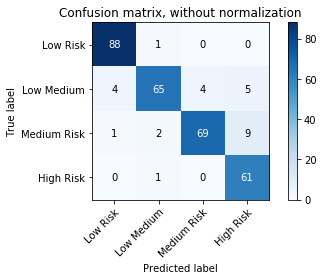

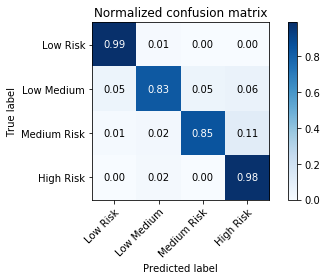

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
'''
#the dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.
#The Flatten layer is a utility layer that flattens the input of shape 
#Keras Conv2D is a 2D Convolution Layer, this layer creates 
 a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
#Max pooling operation for 2D spatial data. Downsamples the input representation 
 by taking the maximum value over the window defined by pool_size for each dimension along the features axis.
#Stride is the number of pixels shifts over the input matrix. 
 When the stride is 1 then we move the filters to 1 pixel at a time.
#Same padding means the size of output feature-maps are the same as the input feature-maps 
'''
model = Sequential()
#In a CNN context, people sometimes use "kernel size" to mean the size of a convolutional filter, and likewise a "kernel" is the filter itself.
#First convolution layer, it consist of 64 kernals, Therefore creating 64 samples for an input.
model.add(Conv2D(64, kernel_size=(2,2), input_shape=(5,5,1), strides=(1, 1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Second convolutional layer, it consist of 128 kernals, Therefore creating 128 samples for each 64 input from previous layes.
model.add(Conv2D(128, (2, 2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
#compiling the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#output the summary of the network
model.summary()
batch_size = 10
#Traversing the data set for 1500 times.
epochs = 1500
history = model.fit(x_train, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_binary))
result = model.predict_classes(x_test)

#Confusion Metrics
def plot_confusion_matrix(y_test, result, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, result)
    # Only use the labels that appear in the data
  #  classes = classes[unique_labels(y_test, result)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = ['Low Risk', 'Low Medium', 'Medium Risk', 'High Risk']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, result, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, result, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()








In [23]:
result

array([4, 1, 1, 3, 4, 3, 1, 1, 3, 1, 3, 3, 4, 2, 4, 1, 3, 1, 1, 1, 1, 2,
       1, 3, 3, 4, 3, 3, 2, 4, 3, 3, 4, 1, 2, 1, 2, 3, 2, 3, 3, 3, 1, 2,
       2, 3, 2, 1, 4, 2, 3, 4, 2, 3, 2, 4, 3, 4, 1, 3, 4, 1, 4, 3, 1, 3,
       3, 3, 1, 2, 4, 4, 2, 4, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 3, 1, 2, 4,
       3, 2, 1, 3, 4, 2, 1, 3, 3, 2, 4, 3, 1, 3, 3, 4, 4, 1, 2, 4, 3, 3,
       1, 4, 1, 3, 3, 1, 3, 4, 2, 4, 1, 3, 2, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       4, 2, 1, 3, 3, 1, 2, 4, 1, 3, 1, 2, 4, 3, 3, 1, 2, 1, 1, 2, 1, 4,
       1, 1, 1, 4, 4, 4, 4, 2, 1, 4, 4, 2, 2, 1, 4, 2, 1, 1, 2, 1, 3, 1,
       2, 3, 4, 1, 3, 4, 1, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3, 4, 3, 1, 1, 1,
       1, 3, 3, 4, 2, 3, 1, 3, 4, 4, 1, 3, 1, 1, 1, 1, 4, 1, 1, 4, 3, 1,
       2, 4, 3, 2, 2, 3, 4, 1, 2, 1, 2, 2, 3, 1, 3, 3, 1, 4, 4, 3, 4, 1,
       1, 3, 1, 1, 3, 3, 1, 4, 3, 1, 3, 1, 1, 1, 3, 1, 4, 4, 3, 4, 1, 4,
       3, 2, 2, 2, 1, 3, 3, 1, 3, 2, 3, 4, 4, 2, 2, 3, 3, 1, 3, 3, 1, 1,
       2, 1, 1, 4, 4, 4, 3, 4, 4, 2, 3, 2, 3, 2, 2,

In [29]:
#Saving the trained model into the file "CNN_model.h5" 
model.save('CNN_model.h5')

In [32]:
#load the saved model
from tensorflow.keras.models import load_model
new_model = load_model('CNN_model.h5')

In [33]:
#checking the summary of the new model, 
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 5, 64)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 33,861
Trainable params: 33,861
Non-trainable params: 0
_________________________________________________________________


In [34]:
#saved weights of the CNN network.
new_model.get_weights()

[array([[[[-1.51e+00, -8.66e-01,  1.15e+00, -9.46e-01, -1.35e+00,
            3.29e-01,  1.67e+00, -1.83e+00,  8.44e-01, -1.38e+00,
            1.41e+00, -4.73e-01, -4.96e-02,  1.86e+00, -9.78e-01,
            3.43e-01, -1.87e-01,  4.48e-01,  1.82e+00, -5.17e-01,
            1.32e-01, -1.26e+00,  1.22e+00,  8.32e-01,  1.36e+00,
            5.31e-01,  4.33e-01,  1.72e-01, -1.16e+00,  1.95e+00,
            9.07e-01,  2.31e+00,  1.10e-01,  1.15e+00, -6.44e-02,
           -3.80e-01, -8.38e-01, -3.92e-01,  1.27e-01,  1.38e+00,
           -1.25e+00, -4.86e-01,  1.71e-01, -1.25e-01, -2.84e-02,
            1.51e+00, -1.74e+00,  6.00e-01, -9.06e-01, -2.12e-01,
           -1.90e+00,  1.39e+00,  1.21e+00, -6.22e-02,  1.11e-01,
            3.18e+00, -6.00e-02,  1.29e+00,  1.23e+00, -1.45e+00,
            1.76e+00, -1.44e-01, -1.20e-01,  9.65e-01]],
 
         [[ 1.45e-01,  1.04e+00,  9.36e-01,  4.85e-01, -8.77e-01,
            9.18e-01, -5.66e-01, -1.61e-01,  2.49e-01,  1.30e+00,
            2.94e

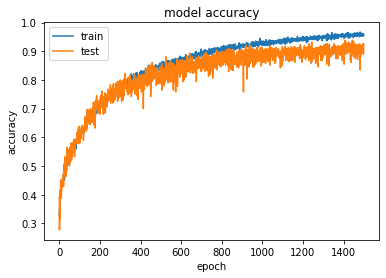

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


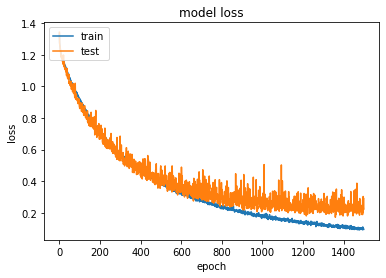

In [54]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()